# Purpose:
The purpose of the algorithm is not to generate the same graph but to generate a pruned graph that only includes the most important nodes based on their <b>Eigen Vector Centrality</b> scores. Eigen Vector Centrality is helpful for this because <b>it measures the importance of a node in a network by considering not only its direct connections, but also the importance of the nodes it is connected to</b>. This allows us to identify the most influential nodes in the network, which can be useful for various applications such as identifying key players in a social network or detecting important genes in a biological network.

### Note:
To understand this concept better, consider a social network where the nodes represent people and the edges represent friendships. If a person is friends with many other people who are themselves well-connected, that person is likely to have a high Eigen Vector Centrality score because they are connected to other important people in the network. On the other hand, if a person is friends with only a few people who are not well-connected, their Eigen Vector Centrality score will be lower.

In [38]:
import networkx as nx
import matplotlib.pyplot as plt


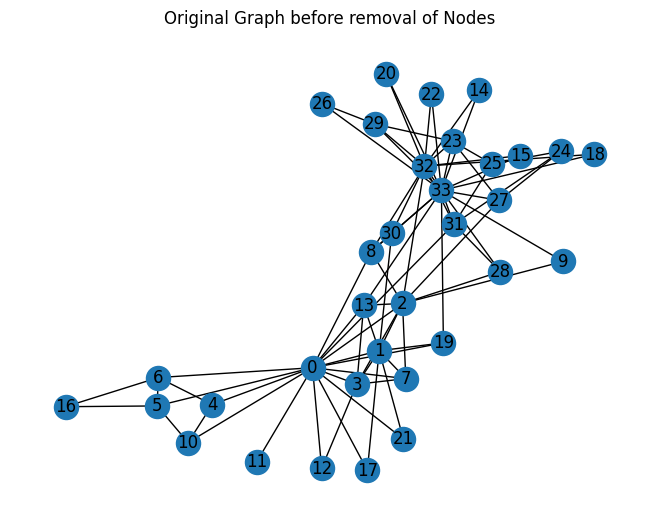

In [39]:

# Load Karate Club graph model
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.title("Original Graph before removal of Nodes")
plt.show()


In [40]:

# Computes the Eigen Vector Centrality scores for all nodes in the graph G 
# using the eigenvector_centrality function from the NetworkX library. 
# The result is a dictionary that maps each node to its corresponding Eigen Vector Centrality score.
centrality = nx.eigenvector_centrality(G)
print(centrality)


{0: 0.35548349418519426, 1: 0.2659538704545024, 2: 0.3171893899684447, 3: 0.21117407832057056, 4: 0.0759664588165738, 5: 0.07948057788594245, 6: 0.07948057788594245, 7: 0.1709551149803543, 8: 0.22740509147166046, 9: 0.10267519030637756, 10: 0.0759664588165738, 11: 0.05285416945233646, 12: 0.08425192086558085, 13: 0.22646969838808145, 14: 0.10140627846270832, 15: 0.10140627846270832, 16: 0.02363479426059687, 17: 0.0923967566684595, 18: 0.10140627846270832, 19: 0.14791134007618667, 20: 0.10140627846270832, 21: 0.0923967566684595, 22: 0.10140627846270832, 23: 0.15012328691726787, 24: 0.057053735638028055, 25: 0.0592082025027901, 26: 0.07558192219009324, 27: 0.13347932684333308, 28: 0.13107925627221215, 29: 0.13496528673866567, 30: 0.17476027834493088, 31: 0.191036269797917, 32: 0.3086510477336959, 33: 0.37337121301323506}


In [41]:
# Here setting the threshold to 0.1. This means that it only retain nodes 
# with an Eigen Vector Centrality score of 0.1 or higher.
# Set a threshold value
threshold = 0.1


In [42]:
# Remove nodes with low Eigen Vector Centrality scores
# It uses a list comprehension to select the important nodes based on their Eigen Vector Centrality scores. 
# For each node n and its corresponding Eigen Vector Centrality score c in the centrality dictionary, 
# the condition c >= threshold is checked. If this condition is True, the node is added to the important_nodes list. 
# Otherwise, it is excluded.
important_nodes = [n for n, c in centrality.items() if c >= threshold]


In [43]:
# This generates a new graph pruned_G that only includes the important nodes and their corresponding edges 
# using the subgraph function. This function takes a list of nodes as input and returns a new graph that 
# only includes these nodes and their corresponding edges.
pruned_G = G.subgraph(important_nodes)


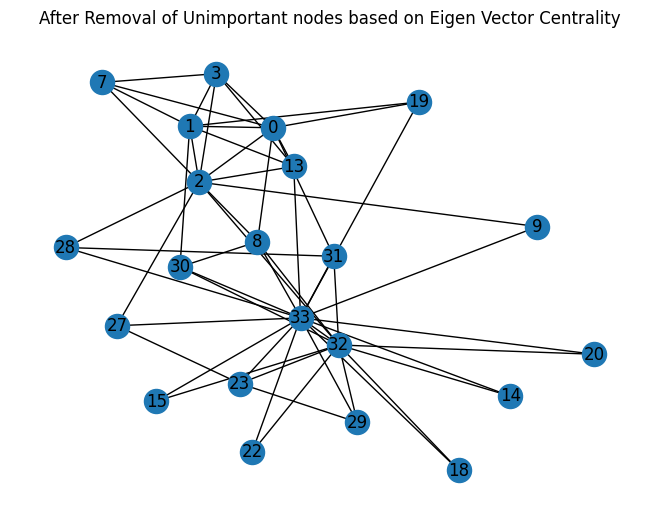

In [44]:

# Visualize the pruned graph
pos = nx.spring_layout(pruned_G)
nx.draw(pruned_G, pos, with_labels=True)
plt.title("After Removal of Unimportant nodes based on Eigen Vector Centrality")
plt.show()